# Project 2: Ames Housing Data and Kaggle Challenge

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [115]:
#Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline

## Data Import and Cleaning

#### 1. Read In Ames Housing Training Data

Read in the `train.csv` file and assign it to appropriately named pandas dataframes.

In [116]:
!pwd

/Users/michaelknight/DSI/Submissions/projects/project_2


In [117]:
#Code:
#read train.csv into 'train'
train = pd.read_csv('./datasets/train.csv')

In [118]:
#code
#save the original clean train.csv data (saved as train) and export into a .csv file in our current lab folder
# just in case we need to reference it so it doesn't get accidentally permanently deleted
train.to_csv('./datasets/clean_train.csv', index=False)

In [119]:
#Code:
#return first 10 values of train.csv
train.head(n=10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [120]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [121]:
train.shape

(2051, 81)

In [122]:
#count how many null values overall in the dataframe
train.isnull().sum().sum()

9822

In [123]:
#see where null values are
train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [124]:
dict(train.dtypes)

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'MS SubClass': dtype('int64'),
 'MS Zoning': dtype('O'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'Lot Shape': dtype('O'),
 'Land Contour': dtype('O'),
 'Utilities': dtype('O'),
 'Lot Config': dtype('O'),
 'Land Slope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition 1': dtype('O'),
 'Condition 2': dtype('O'),
 'Bldg Type': dtype('O'),
 'House Style': dtype('O'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Year Built': dtype('int64'),
 'Year Remod/Add': dtype('int64'),
 'Roof Style': dtype('O'),
 'Roof Matl': dtype('O'),
 'Exterior 1st': dtype('O'),
 'Exterior 2nd': dtype('O'),
 'Mas Vnr Type': dtype('O'),
 'Mas Vnr Area': dtype('float64'),
 'Exter Qual': dtype('O'),
 'Exter Cond': dtype('O'),
 'Foundation': dtype('O'),
 'Bsmt Qual': dtype('O'),
 'Bsmt Cond': dtype('O'),
 'Bsmt Exposure': dtype('O'),
 'BsmtFin Type 1': dtype('O'),
 'BsmtFin S

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [126]:
#replace columns where NA values are represented as something specific with that value
train['Alley'].fillna('No Alley', inplace=True)
train['Bsmt Qual'].fillna('No Basement', inplace=True)
train['Bsmt Cond'].fillna('No Basement', inplace=True)
train['Bsmt Exposure'].fillna('No Basement', inplace=True)
train['BsmtFin Type 1'].fillna('No Basement', inplace=True)
train['BsmtFin Type 2'].fillna('No Basement', inplace=True)
train['Fireplace Qu'].fillna('No Fireplace', inplace=True)
train['Garage Type'].fillna('No Garage', inplace=True)
train['Garage Finish'].fillna('No Garage', inplace=True)
train['Garage Qual'].fillna('No Garage', inplace=True)
train['Garage Cond'].fillna('No Garage', inplace=True)
train['Pool QC'].fillna('No Pool', inplace=True)
train['Fence'].fillna('No Fence', inplace=True)
train['Misc Feature'].fillna('None', inplace=True)


In [127]:
#see where null values are
train.isnull().sum().sum()

498

In [128]:
#replace columns where there are no values for a feature because house doesnt have said feature with 0

train['BsmtFin SF 1'].fillna(0, inplace=True)
train['BsmtFin SF 2'].fillna(0, inplace=True)
train['Bsmt Unf SF'].fillna(0, inplace=True)
train['Total Bsmt SF'].fillna(0, inplace=True)
train['Bsmt Full Bath'].fillna(0, inplace=True)
train['Bsmt Half Bath'].fillna(0, inplace=True)

train['Garage Yr Blt'].fillna(0, inplace=True)
train['Garage Cars'].fillna(0, inplace=True)
train['Garage Area'].fillna(0, inplace=True)


train['Pool Area'].fillna(0, inplace=True)

In [129]:
#see where null values are
train.isnull().sum().sum()

374

In [130]:
train['Mas Vnr Type'].describe()

count     2029
unique       4
top       None
freq      1218
Name: Mas Vnr Type, dtype: object

In [131]:
train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [132]:
train['Mas Vnr Type'].isnull().sum()

22

In [133]:
train['Mas Vnr Area'].isnull().sum()

22

In [134]:
# it doesn't seem coincidental that there are the exact same amount of houses with null Mason Veneer types
# as there are houses with null Mass veneer areas.  I replaced the the type values with 'None' and the
# area values with 0
train['Mas Vnr Type'].fillna('None', inplace=True)
train['Mas Vnr Area'].fillna(0, inplace=True)

In [135]:
#see where null values are
train.isnull().sum().sum()

330

In [136]:
#notice that there are the same amount of total null values as the amount of null values in Lot Frontage
train['Lot Frontage'].isnull().sum()

330

In [137]:
train['Lot Frontage'].fillna(0, inplace=True)
###### OR.... SHOULD I MAYBE *DROP* EVERY ROW WITH A LOT FRONTAGE WITH NULL VALUE????
#train.drop(columns='Lot Frontage', inplace=True)
#thats one of our lowe correlation columns and was 
#going to be dropped anyways

In [138]:
#see where null values are
train.isnull().sum().sum()

0

In [139]:
train['Lot Frontage'].head()

0     0.0
1    43.0
2    68.0
3    73.0
4    82.0
Name: Lot Frontage, dtype: float64

In [140]:
train.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [141]:
train[train['Lot Area']==0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [142]:
#replace columns where there are no values for a feature because house doesnt have said feature with 0

# mask_bsmnt1 = train['Bsmt Qual'] == 'No Basement'
# mask_bsmnt2 = train['Bsmt Cond'] == 'No Basement'
# mask_bsmnt3 = train['Bsmt Exposure'] == 'No Basement'
# mask_bsmnt4 = train['BsmtFin Type 1'] == 'No Basement'
# mask_bsmnt5 = train['BsmtFin Type 2'] == 'No Basement'
# mask_bsmnt = (mask_bsmnt1 | mask_bsmnt2 | mask_bsmnt3 | mask_bsmnt4 | mask_bsmnt5)


# if mask_bsmnt:

#     train['BsmtFin SF 1'].fillna(0, inplace=True)
#     train['BsmtFin SF 2'].fillna(0, inplace=True)
#     train['Bsmt Unf SF'].fillna(0, inplace=True)
#     train['Total Bsmt SF'].fillna(0, inplace=True)
#     train['Bsmt Full Bath'].fillna(0, inplace=True)
#     train['Bsmt Half Bath'].fillna(0, inplace=True)


    
# mask_garage1 = train['Garage Type'] == 'No Garage'
# mask_garage2 = train['Garage Finish'] == 'No Garage'
# mask_garage3 = train['Garage Qual'] == 'No Garage'
# mask_garage4 = train['Garage Cond'] == 'No Garage'
# mask_garage = (mask_garage1 | mask_garage2 | mask_garage3 | mask_garage4)

# if mask_garage:
#     train['Garage Yr Blt'].fillna(0, inplace=True)
#     train['Garage Cars'].fillna(0, inplace=True)
#     train['Garage Area'].fillna(0, inplace=True)


# mask_pool = train['Pool QC'] == 'No Pool'


# if mask_pool:
#     train['Pool Area'].fillna(0, inplace=True)

In [143]:
# mask_bsmnt1 = train['Bsmt Qual'] == 'No Basement'
# mask_bsmnt2 = train['Bsmt Cond'] == 'No Basement'
# mask_bsmnt3 = train['Bsmt Exposure'] == 'No Basement'
# mask_bsmnt4 = train['BsmtFin Type 1'] == 'No Basement'
# mask_bsmnt5 = train['BsmtFin Type 2'] == 'No Basement'
# mask_bsmnt = (mask_bsmnt1 | mask_bsmnt2 | mask_bsmnt3 | mask_bsmnt4 | mask_bsmnt5)

# train[mask_bsmnt].isnull().sum().sum()
# train[mask_bsmnt]['BsmtFin SF 2'].isnull()#.sum()
# train['Bsmt Unf SF'].isnull().sum()
# #1327
# train['Pool QC'].isnull().sum()
# train[mask_bsmnt]

In [144]:
# mask_garage1 = train['Garage Type'] == 'No Garage'
# mask_garage2 = train['Garage Finish'] == 'No Garage'
# mask_garage3 = train['Garage Qual'] == 'No Garage'
# mask_garage4 = train['Garage Cond'] == 'No Garage'
# mask_garage = (mask_garage1 | mask_garage2 | mask_garage3 | mask_garage4)


In [145]:
train['Bsmt Full Bath'].unique()

array([0., 1., 2., 3.])

In [146]:
train['Lot Frontage'].unique()

array([  0.,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [147]:
train['Lot Frontage'].isnull().sum()

0

In [148]:
train['Lot Frontage'].unique()

array([  0.,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [149]:
def eda(dataframe):
    print("missing values: {}".format(dataframe.isnull().sum()))
    print("dataframe index: {}".format(dataframe.index))
    print("dataframe types: {}".format(dataframe.dtypes))
    print("dataframe shape: {}".format(dataframe.shape))
    print("dataframe describe: {}".format(dataframe.describe()))

    for item in dataframe:
        print(item)
        print(dataframe[item].nunique())

In [150]:
eda(train)

missing values: Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
                 ..
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Wood Deck SF      0
Open Porch SF     0
Encl

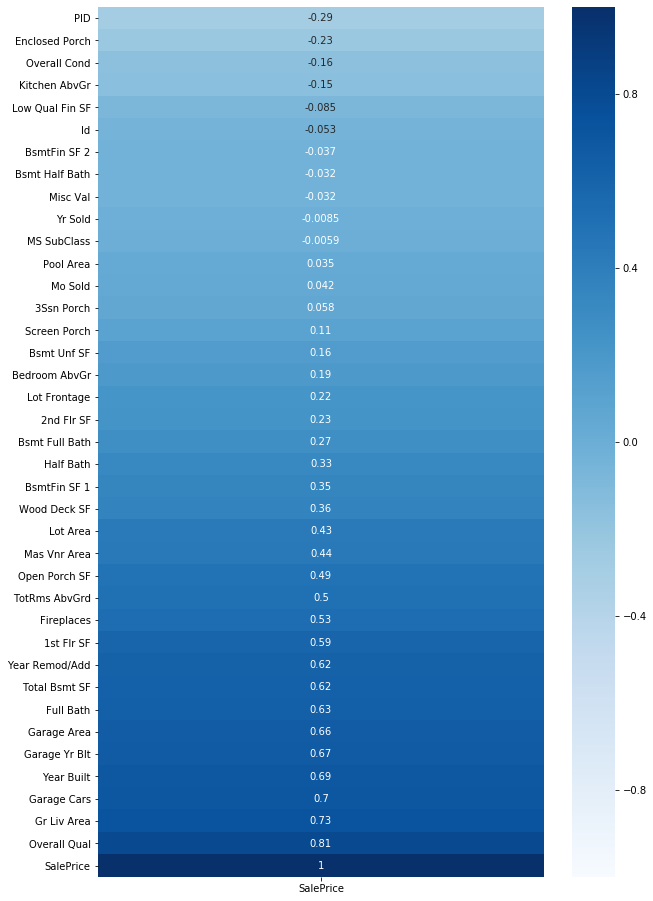

In [151]:
# look a heatmap to observe the correlation of the numerical data compared specifically to SalePrice
plt.figure(figsize=(10,16))
sns.heatmap(train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice'), cmap='Blues', annot=True, vmin=-1);


In [152]:
# # before we make dummies for the qualitative features, lets drop the columns of features that we know from the heatmap
# # to have very low correlation (drop everything under 50% correlation, both positively AND negatively)
# corr_less_pos_50 = (train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice')<.5)  
# corr_great_neg_50 = (train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice')>-.5)

# drop_cols = corr_less_pos_50 & corr_great_neg_50
# drop_cols
# #train.columns[0]

In [153]:
# # find a dataframe of all the collumns in our dataframe as they correlate to SalePrice, from lowest to highest
# # set this under the variable corr
# corr = train.corr()[['SalePrice']].sort_values('SalePrice')


# # find all the columns in our new dataframe that correlate to sales price, where the correlation
# # is either less than 0.5 or greater than -0.25, and set this under the variable corr_features
# corr_features = corr[(corr.SalePrice < 0.5) & (corr.SalePrice > -0.25)]
# #worked with russ on this



In [154]:
# ##### NOTE: WE WILL USE THIS SAME LIST OF COLUMNS ON OUR TEST DATA LATER
# # This sets the dataframe of columns whose correlation to salesprice is too weak to be of use
# # as a list, which we save under the variable drop_cols1
# drop_cols1 = corr_features.index.values
# #worked with russ on this
# #note that this list includes 'Id' which we do NOT want to drop from the test dataframe
# # can't drop "Id" because we need that column for submission.  Id is in cell 4, so we can remove from drop_cols1
# drop_cols1[4] 

In [155]:
# removed Id from the columns that we're going to drop, so that Id will remain in the dataframe
# drop_cols1 = np.delete(drop_cols1, 4)

In [156]:
# drop the columns whose correlation to salesprice is too weak to be of use from our train dataframe
# NOTE: 1st drop
# train.drop(columns=drop_cols1, inplace=True)

In [157]:
# train.drop(columns=['PID', 'Enclosed Porch', 'Overall Cond', 'Kitchen AbvGr', 'Low Qual Fin SF', 'Id', 
#                     'BsmtFin SF 2', 'Bsmt Half Bath', 'Misc Val', 'Yr Sold', 'MS SubClass', 'Pool Area', 
#                     'Mo Sold', '3Ssn Porch', 'Screen Porch', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Lot Frontage', 
#                     '2nd Flr SF', 'Bsmt Full Bath', 'Half Bath', 'BsmtFin SF 1', 'Wood Deck SF', 'Lot Area', 
#                     'Mas Vnr Area', 'Open Porch SF'], inplace=True)

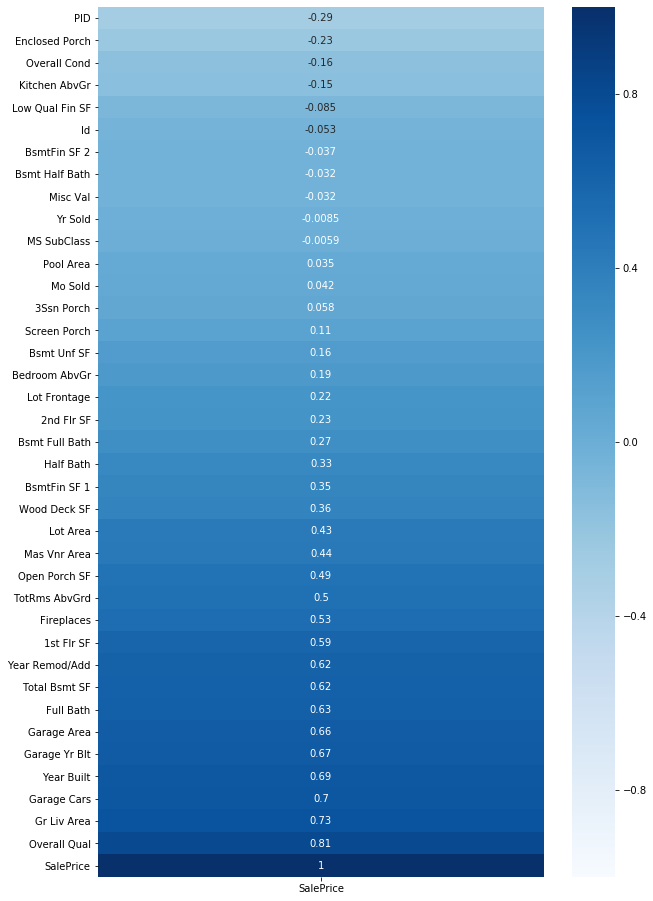

In [158]:
# look a heatmap to observe the correlation of the numerical data compared specifically to SalePrice
plt.figure(figsize=(10,16))
sns.heatmap(train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice'), cmap='Blues', annot=True, vmin=-1);


In [159]:
train.shape

(2051, 81)

In [160]:
#take all of our non-numerical data and turn it into dummy variables, so we can see how they correlate to price
train = pd.get_dummies(train, drop_first=True)

In [161]:
train.shape

(2051, 264)

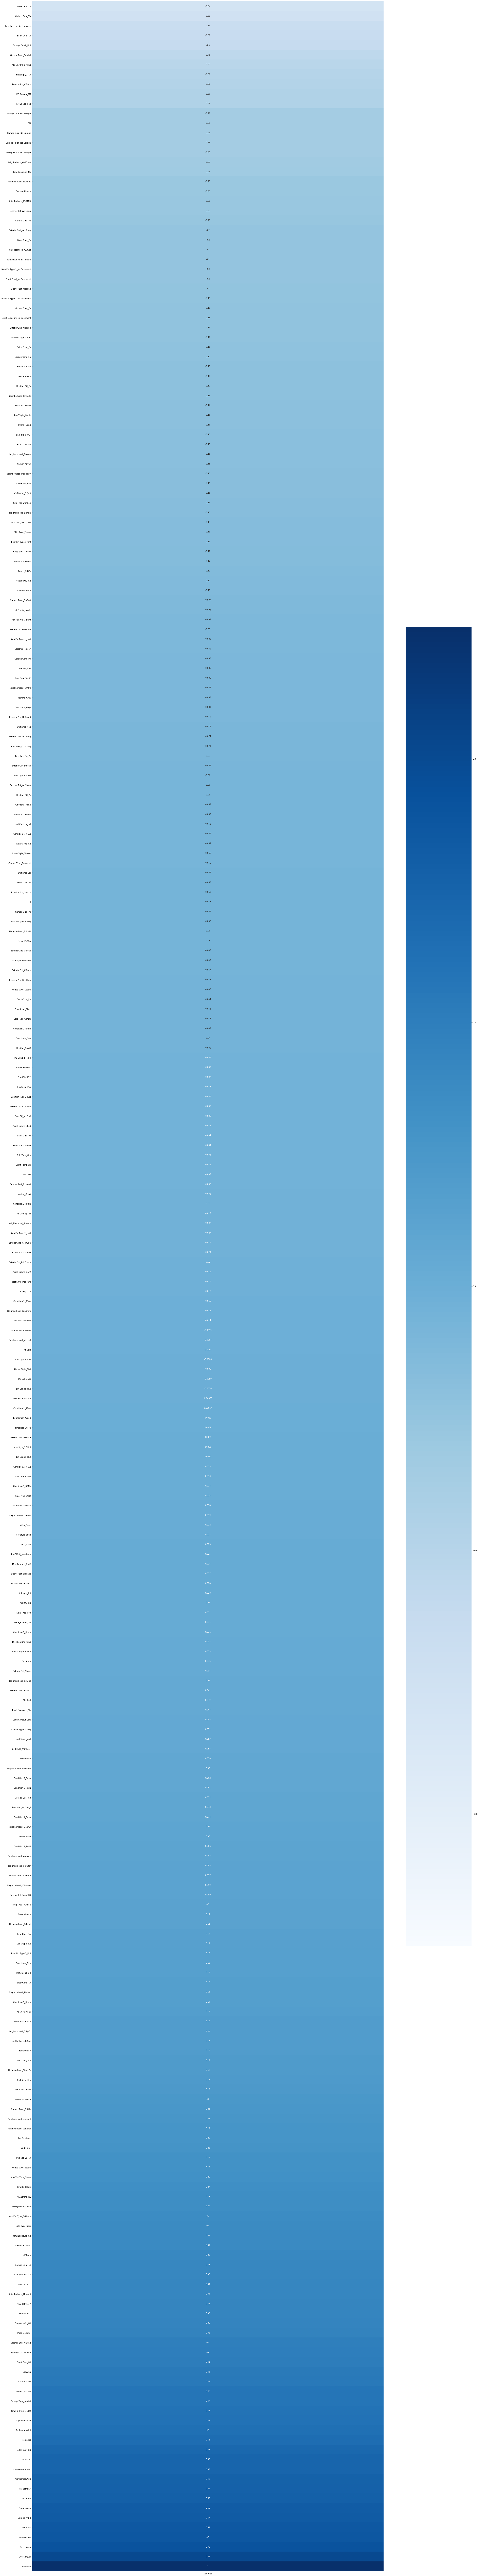

In [162]:
# look a heatmap to observe the correlation of the numerical data compared specifically to SalePrice
plt.figure(figsize=(40,240))
sns.heatmap(train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice'), cmap='Blues', annot=True, vmin=-1);


In [163]:
# # find a dataframe of all the collumns in our dataframe as they correlate to SalePrice, from lowest to highest
# # set this under the variable corr
# corr = train.corr()[['SalePrice']].sort_values('SalePrice')

In [164]:
# # find all the columns in our new dataframe that correlate to sales price, where the correlation
# # is either less than 0.5 or greater than -0.25, and set this under the variable corr_features
# corr_features = corr[(corr.SalePrice < 0.5) & (corr.SalePrice > -0.25)]

In [165]:
# ##### NOTE: WE WILL USE THIS SAME LIST OF COLUMNS ON OUR TEST DATA LATER
# # This sets the dataframe of dummy columns whose correlation to salesprice is too weak to be of use
# # as a list, which we save under the variable drop_cols2
# drop_cols2 = corr_features.index.values

In [166]:
# #note that this list includes 'Id' which we do NOT want to drop from the test dataframe
# # can't drop "Id" because we need that column for submission.  Id is in cell 73, so we can remove from drop_cols1
# drop_cols2[73]

In [167]:
# drop_cols2 = np.delete(drop_cols2, 73)

In [338]:
# drop_cols2

In [169]:
# # drop the columns whose correlation to salesprice is too weak to be of use from our train dataframe
# # NOTE: 2nd drop (for the dummy variables)
# train.drop(columns=drop_cols2, inplace=True)

In [332]:
train.shape

(2051, 264)

In [339]:
# this is a list dummy columns that are in test but not in train
test_to_train_dummies

['Roof Matl_Metal',
 'Roof Matl_Roll',
 'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Mas Vnr Type_CBlock',
 'Heating_GasA',
 'Electrical_None',
 'Kitchen Qual_Po',
 'Sale Type_VWD']

In [335]:
# add each of the dummy columns that are in test but not in train and set them all to zero (since they are yess/no 
# and do not exist in train)
for col in test_to_train_dummies:
    train[col] = 0

In [336]:
train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Roof Matl_Metal,Roof Matl_Roll,Exterior 1st_PreCast,Exterior 2nd_Other,Exterior 2nd_PreCast,Mas Vnr Type_CBlock,Heating_GasA,Electrical_None,Kitchen Qual_Po,Sale Type_VWD
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,0


In [451]:
#######NOTE USE THESE FEATURES LATER WITH TEST
#set the features we will use as the columns and dummy columns with strong enough correlation with price
features = train.columns.drop('SalePrice', 'Id', 'PID')
#notice we are dropping SalesPrice from features, and that features contains ID

TypeError: drop() takes from 2 to 3 positional arguments but 4 were given

In [341]:
features

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       ...
       'Roof Matl_Metal', 'Roof Matl_Roll', 'Exterior 1st_PreCast',
       'Exterior 2nd_Other', 'Exterior 2nd_PreCast', 'Mas Vnr Type_CBlock',
       'Heating_GasA', 'Electrical_None', 'Kitchen Qual_Po', 'Sale Type_VWD'],
      dtype='object', length=273)

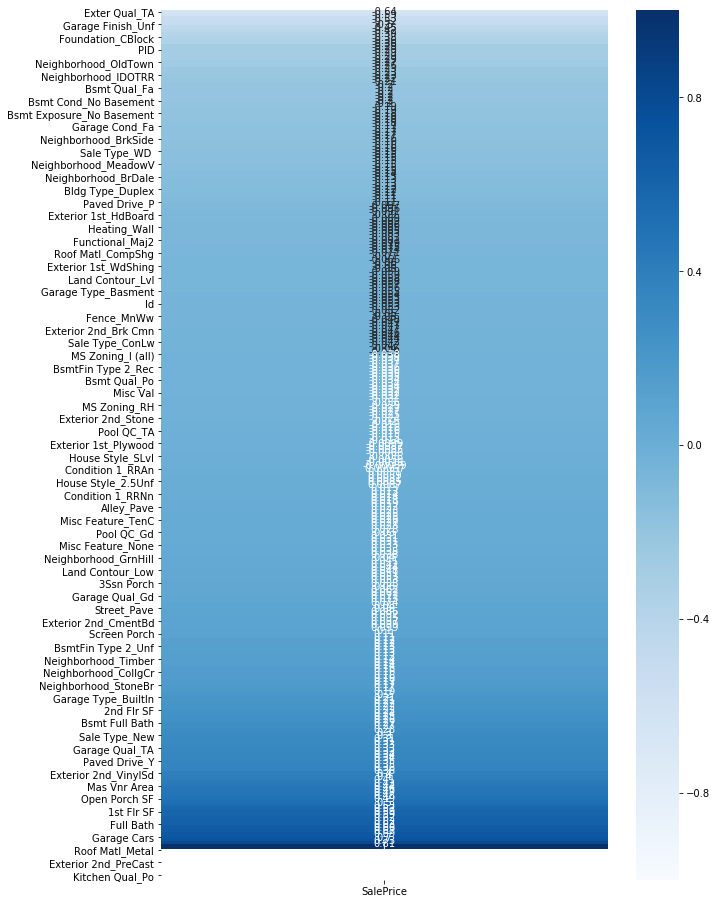

In [342]:
# look a heatmap to observe the correlation of the numerical data compared specifically to SalePrice
plt.figure(figsize=(10,16))
sns.heatmap(train.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice'), cmap='Blues', annot=True, vmin=-1);


In [343]:
X = train[features]
y = train['SalePrice']
X.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Roof Matl_Metal,Roof Matl_Roll,Exterior 1st_PreCast,Exterior 2nd_Other,Exterior 2nd_PreCast,Mas Vnr Type_CBlock,Heating_GasA,Electrical_None,Kitchen Qual_Po,Sale Type_VWD
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,0


In [344]:
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [345]:
#Use the train_test_split function to split our X and y variables into a training set and a holdout set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [346]:
#we'll want to scale our features for testing Lasso and ridge models
#fit a StandardScaler to X_train and use it to transform both  X_train and X_test
#only Xtrain and Xtest will be fit
ss= StandardScaler()
ss.fit(X_train)  #ONLY FIT TO TRAINING DATA
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test) #NOTICE NO FITTING HAPPENED HERE


In [347]:
ss1= StandardScaler()
ss1.fit(X) 

#scale the X as well
X_sc = ss1.transform(X)

In [348]:
#create instance of Linear Regression model
lr = LinearRegression()

In [349]:
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [350]:
lr.score(X_train_sc, y_train)

0.9452615966160178

In [351]:
lr.score(X_test_sc, y_test)

-3.9563716821887044e+21

In [352]:
#create instance of LASSO model

lasso = LassoCV(cv=5)

In [353]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [354]:
lasso.score(X_train_sc, y_train)

0.908872181615521

In [355]:
lasso.score(X_test_sc, y_test)

0.904816060852354

In [356]:
#create instance of Ridge model

ridge = RidgeCV()

In [357]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [358]:
ridge.score(X_train_sc, y_train)

0.9374084645192793

In [359]:
ridge.score(X_test_sc, y_test)

0.9135018456612019

In [360]:
#test cvs for linreg model
cross_val_score(lr, X_sc, y, cv=5).mean()

-7.092884770501868e+21

In [361]:
cross_val_score(lasso, X_sc, y, cv=5).mean() 

/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1031286131.7230225, tolerance: 823646953.5739902
  tol, rng, random, positive)
/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1592969583.361023, tolerance: 823646953.5739902
  tol, rng, random, positive)
/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1641704985.3082275, tolerance: 823646953.5739902
  tol, rng, random, positive)
/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklear

0.8553881083005349

In [362]:
#test cros val score for Ridge model
cross_val_score(ridge, X_sc, y, cv=5).mean() 

0.8506255857693936

In [446]:
#lasso cv seems to be doing the best so lets try fitting the model to the training data and evaluate training 
# and test model
# fit ridge
lasso.fit(X_sc, y);

/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1027640799.4465332, tolerance: 1026891063.9887587
  tol, rng, random, positive)
/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1648331754.677002, tolerance: 1026891063.9887587
  tol, rng, random, positive)
/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1679851021.3094482, tolerance: 1026891063.9887587
  tol, rng, random, positive)
/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/skl

In [447]:
lasso.score(X_sc, y)

0.9302641599488124

In [448]:
lasso.score(X_test_sc, y_test)

0.9332782439609257

In [366]:
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663015925.4854736, tolerance: 640153836.8997183
  tol, rng, random, positive)
/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 652814744.5375977, tolerance: 640153836.8997183
  tol, rng, random, positive)
/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639883613.8671875, tolerance: 607210612.1840992
  tol, rng, random, positive)
/Users/michaelknight/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/

0.8085426501807682

In [367]:
pred = ridge.predict(X_test_sc)

In [368]:
residuals = y_test - pred

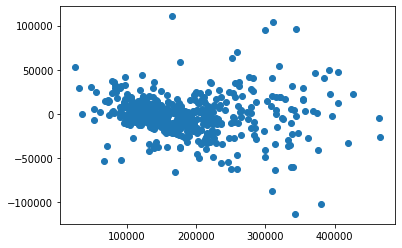

In [369]:
#plt(ridge.coef_ * X + ridge.intercept_)
plt.scatter(pred, residuals);

In [370]:
#Code:
#read test.csv into 'test'
test = pd.read_csv('./datasets/test.csv')

In [371]:
#code
#save the original clean test.csv data (saved as train) and export into a .csv file in our current lab folder
# just in case we need to reference it so it doesn't get accidentally permanently deleted
test.to_csv('./datasets/clean_test.csv', index=False)

In [372]:
#check first 5 values of test.csv
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [373]:
test.shape

(879, 80)

In [374]:
#do everything i did for the train to the test

In [375]:
test.isnull().sum().sum()

4175

In [376]:
#in test: replace columns where NA values are represented as something specific with that value
test['Alley'].fillna('No Alley', inplace=True)
test['Bsmt Qual'].fillna('No Basement', inplace=True)
test['Bsmt Cond'].fillna('No Basement', inplace=True)
test['Bsmt Exposure'].fillna('No Basement', inplace=True)
test['BsmtFin Type 1'].fillna('No Basement', inplace=True)
test['BsmtFin Type 2'].fillna('No Basement', inplace=True)
test['Fireplace Qu'].fillna('No Fireplace', inplace=True)
test['Garage Type'].fillna('No Garage', inplace=True)
test['Garage Finish'].fillna('No Garage', inplace=True)
test['Garage Qual'].fillna('No Garage', inplace=True)
test['Garage Cond'].fillna('No Garage', inplace=True)
test['Pool QC'].fillna('No Pool', inplace=True)
test['Fence'].fillna('No Fence', inplace=True)
test['Misc Feature'].fillna('None', inplace=True)


In [377]:
test.shape

(879, 80)

In [378]:
test.isnull().sum().sum()

208

In [379]:
#in test: replace columns where there are no values for a feature because house doesnt have said feature with 0

test['BsmtFin SF 1'].fillna(0, inplace=True)
test['BsmtFin SF 2'].fillna(0, inplace=True)
test['Bsmt Unf SF'].fillna(0, inplace=True)
test['Total Bsmt SF'].fillna(0, inplace=True)
test['Bsmt Full Bath'].fillna(0, inplace=True)
test['Bsmt Half Bath'].fillna(0, inplace=True)

test['Garage Yr Blt'].fillna(0, inplace=True)
test['Garage Cars'].fillna(0, inplace=True)
test['Garage Area'].fillna(0, inplace=True)


test['Pool Area'].fillna(0, inplace=True)

In [380]:
test.shape

(879, 80)

In [381]:
test.isnull().sum().sum()

163

In [382]:
# in test: replace the the type values with 'None' and the
# area values with 0
test['Mas Vnr Type'].fillna('None', inplace=True)
test['Mas Vnr Area'].fillna(0, inplace=True)

In [383]:
test.shape

(879, 80)

In [384]:
test.isnull().sum().sum()

161

In [385]:
test['Lot Frontage'].fillna(0, inplace=True)
###### OR.... SHOULD I MAYBE *DROP* EVERY ROW WITH A LOT FRONTAGE WITH NULL VALUE????
#test.drop(columns="Lot Frontage", inplace=True)
#thats one of our lowe correlation columns and was 
#going to be dropped anyways

In [386]:
test.shape

(879, 80)

In [387]:
test.isnull().sum().sum()

1

In [388]:
list(test.isnull())[43]
#there is a null value in the Electrical column, but thats one of our lowe correlation columns and was 
#going to be dropped anyways

'Electrical'

In [389]:
test[test['Electrical'].isnull()]#.sum()  #Electrical is null only at one value (635)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
635,1578,916386080,80,RL,73.0,9735,Pave,No Alley,Reg,Lvl,...,0,0,0,No Pool,No Fence,None,0,5,2008,WD


In [390]:
test[test['Electrical'].isnull()]['Electrical']

635    NaN
Name: Electrical, dtype: object

In [391]:
# in test: replace the the type values with 'None' 
test['Electrical'].fillna('None', inplace=True)

In [392]:
test.isnull().sum().sum()

0

In [393]:
#drop_cols1

In [394]:
# #drop the columns from test that we found to be of weak correlation on the training data (round 1)
# # (with the exception of the Id column (which we need to submit)
# test.drop(columns=drop_cols1, inplace=True)

In [395]:
test.shape

(879, 80)

In [396]:
#take all of our non-numerical data and turn it into dummy variables, just as we did with the train data

test = pd.get_dummies(test, drop_first=True)

In [397]:
test.shape

(879, 246)

In [398]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       ...
       'Misc Feature_Shed', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD '],
      dtype='object', length=246)

In [399]:
#drop_cols2

In [400]:
#drop the dummy columns from test that we found to be of weak correlation on the training data (round 2)


#test.drop(columns=drop_cols2, inplace=True)
#test.drop(columns=drop_cols2, inplace=True)

In [401]:
test_features = test.columns

In [402]:
test_features

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       ...
       'Misc Feature_Shed', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD '],
      dtype='object', length=246)

In [403]:
features

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       ...
       'Roof Matl_Metal', 'Roof Matl_Roll', 'Exterior 1st_PreCast',
       'Exterior 2nd_Other', 'Exterior 2nd_PreCast', 'Mas Vnr Type_CBlock',
       'Heating_GasA', 'Electrical_None', 'Kitchen Qual_Po', 'Sale Type_VWD'],
      dtype='object', length=273)

In [404]:
#framework for checking if something in one list but not another best on code by Temple
def col_checker(df1, df2):
    droplist = []
    for col in df1.columns.values.tolist():
        if col not in df2.columns.values.tolist():
            droplist.append(col)
    return droplist

In [405]:
train_to_test_dummies = col_checker(X, test) #values in train but not test (excluding sales price)

In [406]:
train_to_test_dummies

['MS Zoning_C (all)',
 'Utilities_NoSeWa',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Condition 2_Feedr',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Roof Matl_CompShg',
 'Roof Matl_Membran',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Bsmt Cond_Fa',
 'Bsmt Cond_Po',
 'Heating_OthW',
 'Heating_Wall',
 'Heating QC_Po',
 'Electrical_Mix',
 'Functional_Sal',
 'Functional_Sev',
 'Garage Qual_Fa',
 'Pool QC_Fa',
 'Pool QC_Gd',
 'Misc Feature_Gar2',
 'Misc Feature_TenC']

In [407]:
test_to_train_dummies = col_checker(test, train) #values in test but not train

In [409]:
test_to_train_dummies

[]

In [410]:
# add each of the dummy columns that are in train but not in test and set them all to zero (since they are yes/no 
# and do not exist in test)
for col in train_to_test_dummies:
    test[col] = 0

In [412]:
test.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Heating_Wall,Heating QC_Po,Electrical_Mix,Functional_Sal,Functional_Sev,Garage Qual_Fa,Pool QC_Fa,Pool QC_Gd,Misc Feature_Gar2,Misc Feature_TenC
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,20,0.0,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,0


In [413]:
test_features = test.columns

In [415]:
test_features

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       ...
       'Heating_Wall', 'Heating QC_Po', 'Electrical_Mix', 'Functional_Sal',
       'Functional_Sev', 'Garage Qual_Fa', 'Pool QC_Fa', 'Pool QC_Gd',
       'Misc Feature_Gar2', 'Misc Feature_TenC'],
      dtype='object', length=273)

In [416]:
features

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       ...
       'Roof Matl_Metal', 'Roof Matl_Roll', 'Exterior 1st_PreCast',
       'Exterior 2nd_Other', 'Exterior 2nd_PreCast', 'Mas Vnr Type_CBlock',
       'Heating_GasA', 'Electrical_None', 'Kitchen Qual_Po', 'Sale Type_VWD'],
      dtype='object', length=273)

In [292]:
# #take 'features' that we derived from the training data and be sure to remove SalePrice, as it doesnt
# # exist in our testing data
# test_features = features.drop(["SalePrice"])
#features = features.drop(["SalePrice"])

In [417]:
train[test_features].shape

(2051, 273)

In [419]:
test[features].shape

(879, 273)

In [420]:
test[test_features].shape

(879, 273)

In [297]:
test[features].head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_Shed,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,0.0,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [450]:
test[features].head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Roof Matl_Metal,Roof Matl_Roll,Exterior 1st_PreCast,Exterior 2nd_Other,Exterior 2nd_PreCast,Mas Vnr Type_CBlock,Heating_GasA,Electrical_None,Kitchen Qual_Po,Sale Type_VWD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
4,625,535105100,20,0.0,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,1,0,0,0


In [110]:
# first_submission = pd.DataFrame()
# first_submission['Id'] = test['Id']
# first_submission['SalePrice'] = ridge.predict(test[features])
# first_submission.to_csv('./datasets/first_submission.csv', index = False)

In [449]:
ybar = lasso.predict(test[features])
ybar

array([ 1.03101619e+08,  1.13484708e+08,  1.22852531e+08,  7.90438885e+07,
        1.00572534e+08,  5.72077170e+07,  8.11098646e+07,  9.18427024e+07,
        7.79505065e+07,  9.80292456e+07,  8.36193067e+07,  7.61789961e+07,
        1.00905846e+08,  1.27523433e+08,  1.08720651e+08,  8.34643541e+07,
        1.01145012e+08,  8.70979826e+07,  1.14815411e+08,  1.29139940e+08,
        8.28970031e+07,  8.05931474e+07,  9.85951790e+07,  1.29864352e+08,
        9.12412544e+07,  7.35324192e+07,  1.08855497e+08,  9.56754895e+07,
        8.69923657e+07,  2.82302735e+07,  7.43684120e+07,  7.61413359e+07,
        1.31756736e+08,  9.73162019e+07,  1.06240537e+08,  1.05155436e+08,
        8.65161761e+07,  7.51237209e+07,  7.37065343e+07,  8.76882478e+07,
        6.74884631e+07,  1.10043130e+08,  8.71356336e+07,  9.23853780e+07,
        8.68204194e+07,  5.94413357e+07,  1.11528788e+08,  7.96574095e+07,
        7.09144669e+07,  8.22269819e+07,  8.92887232e+07,  1.07012959e+08,
        1.03773716e+08,  

In [438]:
submission_pd = pd.DataFrame(test.Id)

In [439]:
submission_pd.head(5)

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [440]:
submission_pd['SalePrice'] = ybar

In [441]:
submission_pd.head(5)

,Id,SalePrice
0,2658,1.924081e+12
1,2718,1.930074e+12
2,2414,1.126447e+12
3,1989,1.923859e+12
4,625,1.141107e+12


In [434]:
submission_pd.to_csv('./datasets/submission0.csv')

In [435]:
#os.listdir()

In [436]:
submission_pd.to_csv('./datasets/submission.csv', index=False)